In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_loan = pd.read_csv("loan_data.csv")

In [3]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df_loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## EDA 

Text(0.5,0,'fico')

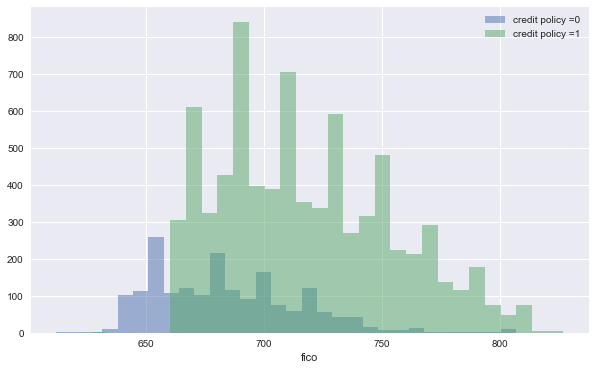

In [20]:
# histogram of two FICO distributions on top of each other, one for each credit.policy outcome.


plt.figure(figsize=(10,6))
df_loan[df_loan['credit.policy']==0]['fico'].hist(alpha = 0.5, bins = 30, label = 'credit policy =0')
df_loan[df_loan['credit.policy']==1]['fico'].hist(alpha = 0.5, bins = 30, label = 'credit policy =1')
plt.legend()
plt.xlabel('fico')

Text(0.5,0,'Fico')

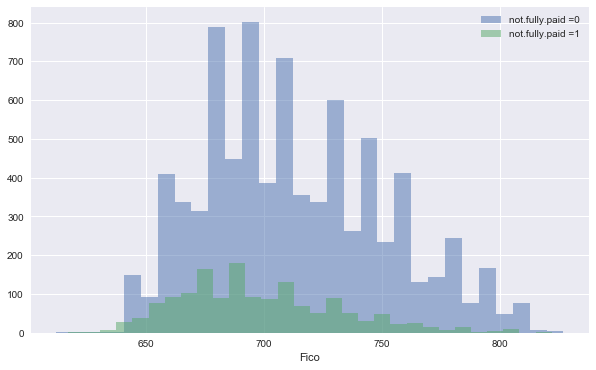

In [23]:
# by the not.fully.paid column

plt.figure(figsize=(10,6))
df_loan[df_loan['not.fully.paid']==0]['fico'].hist(alpha = 0.5, bins =30, label = 'not.fully.paid =0')
df_loan[df_loan['not.fully.paid']==1]['fico'].hist(alpha = 0.5 , bins =30 , label ='not.fully.paid =1')
plt.legend()
plt.xlabel('Fico')

In [ ]:
# countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

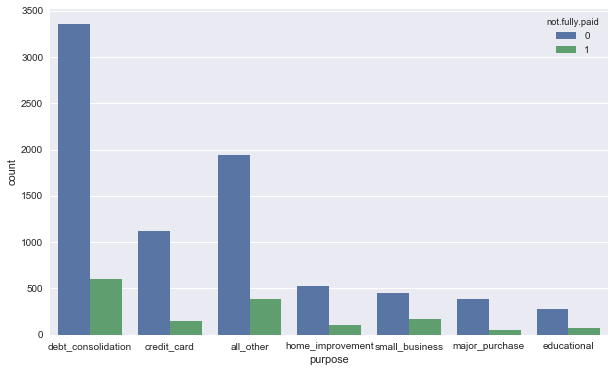

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data = df_loan, hue = 'not.fully.paid')

In [ ]:
# see the trend between FICO score and interest rate.

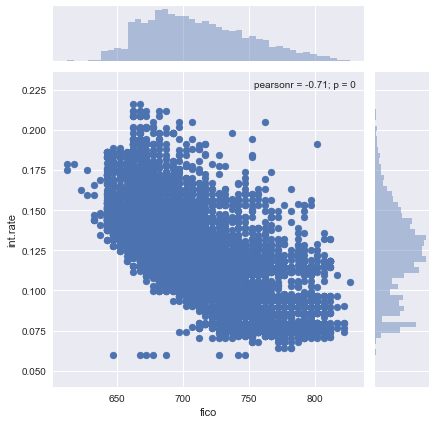

In [27]:
sns.jointplot(x='fico', y = 'int.rate', data = df_loan)

In [ ]:
# see if the trend differed between not.fully.paid and credit.policy.

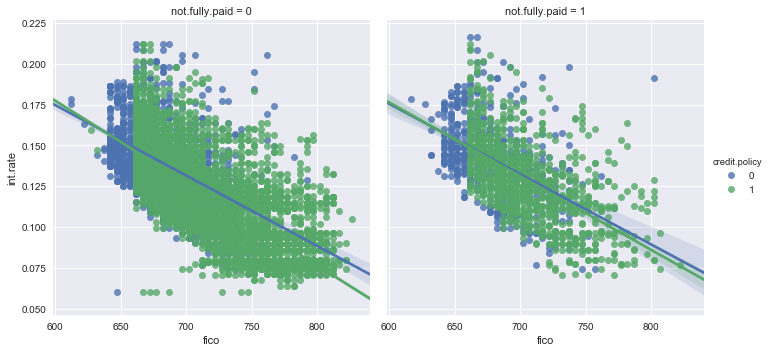

In [32]:
plt.figure(figsize=(10,6))
sns.lmplot(x='fico', y= 'int.rate', hue ='credit.policy', data = df_loan, col = 'not.fully.paid')

## Set up data for the Model

In [33]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [34]:
## as purpose is a categorical data so that needs to be converted to numerical

In [35]:
cat_feats = ['purpose']

In [37]:
df_final = pd.get_dummies(df_loan, columns = cat_feats, drop_first = True)

In [38]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_final.drop('not.fully.paid', axis = 1)
y = df_final['not.fully.paid']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training a decision Tree Model, lets start with a single decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
prediction = dtree.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print (classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2398
          1       0.23      0.24      0.24       476

avg / total       0.75      0.74      0.74      2874



In [50]:
print (confusion_matrix(y_test, prediction))

[[2013  385]
 [ 360  116]]


## Training a random forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
nrfc = RandomForestClassifier(n_estimators=600)

In [54]:
nrfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
n_predictions = nrfc.predict(X_test)

In [59]:
print (confusion_matrix(y_test, n_predictions))

[[2382   16]
 [ 469    7]]


In [60]:
print (classification_report(y_test, n_predictions))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2398
          1       0.30      0.01      0.03       476

avg / total       0.75      0.83      0.76      2874

